In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['font.size'] = 10

In [2]:
data = sns.load_dataset('iris')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


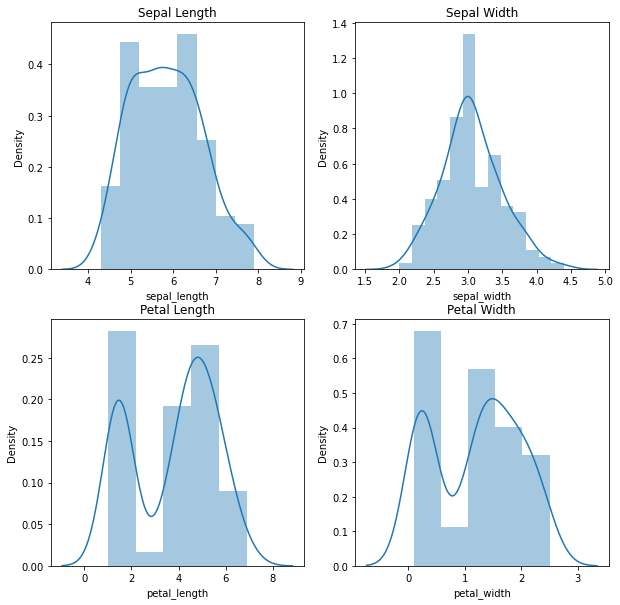

In [5]:
plt.subplot(221)
sns.distplot(data['sepal_length'])
plt.title('Sepal Length')

plt.subplot(222)
sns.distplot(data['sepal_width'])
plt.title('Sepal Width')

plt.subplot(223)
sns.distplot(data['petal_length'])
plt.title('Petal Length')

plt.subplot(224)
sns.distplot(data['petal_width'])
plt.title('Petal Width')


plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
# Independant and Dependant variable

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# Train Test split
X_train, X_test, y_train, y_test, = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=1)
X_train.shape, y_train.shape

((120, 4), (120,))

### Logistic Regression

In [13]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


### Decision Tree

In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dt_pred = dtc.predict(X_test)

print(accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))

0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


### Random Forest Tree

In [18]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rf_pred  = rfc.predict(X_test)

print(accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


### K-Nearest Neighbour

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test,knn_pred))

1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


### AdaBoost Classifier

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
ab_pred = abc.predict(X_test)

print(accuracy_score(y_test, ab_pred))
print(classification_report(y_test, ab_pred))
print(confusion_matrix(y_test, ab_pred))

0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


### Data Pre-processing

In [26]:
# Standardization

from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
# Fit training data
X_train_scaled = scaler.fit_transform(X_train)

In [48]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.describe()

,0,1,2,3
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,5.421589e-16,2.831069e-16,-3.034610e-16,-1.406282e-16
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.855034e+00,-2.434772e+00,-1.592364e+00,-1.446991e+00
25%,-8.903358e-01,-5.235856e-01,-1.252357e+00,-1.188407e+00
50%,-4.622511e-02,-4.578885e-02,3.060059e-01,1.045109e-01
75%,6.772983e-01,6.709062e-01,7.451810e-01,7.509699e-01
max,2.244933e+00,3.298788e+00,1.751034e+00,1.656013e+00


In [50]:
# Transform test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.04622511,  2.34319467, -1.47902854, -1.31769898],
       [-0.89033581, -1.24028061, -0.45900886, -0.15407273],
       [ 0.91847283, -0.04578885,  0.33433978,  0.23380268],
       [-0.52857408,  2.10429632, -1.42236078, -1.05911537],
       [ 2.48610699,  1.86539796,  1.46769499,  1.00955351],
       [ 0.5567111 ,  0.6709062 ,  0.50434307,  0.49238629],
       [ 1.28023456,  0.1931095 ,  0.73101411,  1.39742892],
       [-0.89033581,  1.86539796, -1.08235422, -1.05911537],
       [-1.37268478,  0.43200785, -1.2523575 , -1.31769898],
       [ 1.28023456,  0.43200785,  1.07102067,  1.39742892],
       [-0.2873996 , -0.76248391,  0.22100426,  0.10451088],
       [-0.52857408,  2.10429632, -1.19568974, -1.05911537],
       [ 1.52140905, -0.04578885,  1.18435619,  1.13884531],
       [ 0.67729835,  0.43200785,  0.39100755,  0.36309449],
       [ 0.19494938, -0.2846872 ,  0.39100755,  0.36309449],
       [-1.73444651,  0.43200785, -1.42236078, -1.31769898],
       [-0.04622511, -1.

In [67]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

In [71]:
le = LabelEncoder()

y_train_transformed = le.fit_transform(y_train)

y_train_transformed

array([1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 2, 1, 2, 2, 1, 2, 0])

In [51]:
classifier = LogisticRegression()

classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [57]:
rf_classifier = RandomForestClassifier(n_estimators=20, criterion='entropy', max_depth=100)

rf_classifier.fit(X_train_scaled, y_train)

rf_c_pred = classifier.predict(X_test_scaled)

print(accuracy_score(y_test, rf_c_pred))

0.9666666666666667
